In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

##Approach 1
#import os
#path="/Users/ratmir/Downloads"
#os.chdir(path)

df = pd.read_csv('Q9.csv')
N = 193 # number of columns of df-1 (because first column is 'return' column)
#df = df.iloc[:, 1:N]
df = df.iloc[0:1001, 1:(N+1)]
cols = list(df.columns)
cols.reverse()
df = df[cols] #reverse cols

print(df)

      20171220  20180117  20180418  20180516  20180718  20180822  20181121  \
0     0.180682  0.344786  0.052343  0.041490  0.018417  0.023527  0.139586   
1     0.182047  0.346379  0.052675  0.041700  0.018592  0.023731  0.140330   
2     0.183422  0.347979  0.053010  0.041911  0.018768  0.023937  0.141078   
3     0.184807  0.349586  0.053348  0.042123  0.018946  0.024145  0.141832   
4     0.186203  0.351201  0.053688  0.042337  0.019126  0.024354  0.142590   
...        ...       ...       ...       ...       ...       ...       ...   
996   0.172669  0.208727  0.050818  0.066996  0.052965  0.060773  0.064707   
997   0.171783  0.207262  0.050553  0.066762  0.052753  0.060550  0.064331   
998   0.170902  0.205806  0.050289  0.066529  0.052543  0.060327  0.063956   
999   0.170026  0.204359  0.050027  0.066297  0.052333  0.060105  0.063585   
1000  0.169156  0.202922  0.049767  0.066066  0.052124  0.059885  0.063215   

      20190116  20190327  20190403  ...  20220928  20221005  20

In [2]:
import numpy as np
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

df = np.log(df)
print(df)

      20171220  20180117  20180418  20180516  20180718  20180822  20181121  \
0    -1.711017 -1.064831 -2.949934 -3.182308 -3.994493 -3.749600 -1.969076   
1    -1.703491 -1.060222 -2.943606 -3.177258 -3.985043 -3.740960 -1.963761   
2    -1.695965 -1.055614 -2.937269 -3.172206 -3.975596 -3.732321 -1.958440   
3    -1.688441 -1.051005 -2.930920 -3.167150 -3.966151 -3.723682 -1.953114   
4    -1.680917 -1.046396 -2.924557 -3.162092 -3.956709 -3.715044 -1.947781   
...        ...       ...       ...       ...       ...       ...       ...   
996  -1.756380 -1.566729 -2.979504 -2.703129 -2.938129 -2.800606 -2.737888   
997  -1.761524 -1.573772 -2.984740 -2.706623 -2.942131 -2.804292 -2.743721   
998  -1.766664 -1.580822 -2.989969 -2.710116 -2.946130 -2.807975 -2.749553   
999  -1.771801 -1.587877 -2.995193 -2.713606 -2.950127 -2.811656 -2.755385   
1000 -1.776934 -1.594935 -3.000411 -2.717094 -2.954121 -2.815334 -2.761216   

      20190116  20190327  20190403  ...  20220928  20221005  20

In [3]:
aux = np.broadcast_to(df.values,  (df.shape[1], *df.shape))
#result = np.sqrt(np.square(aux - aux.transpose()).sum(axis=1))

#also possible:
res = scipy.spatial.distance.pdist(df.transpose(), metric='euclidean') #

###NEXT: Cluster based on this distance matrix!!!
# res is a condensed distance matrix

In [4]:
np.all(np.isfinite(res))

True

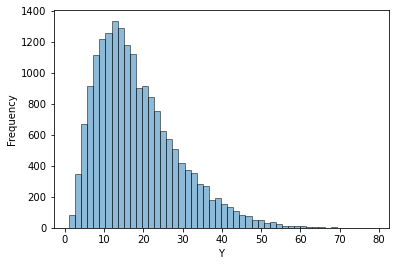

In [5]:
hist, bins = np.histogram(res, bins=50)
plt.hist(res, bins=50, alpha=0.5, ec='black')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.show()

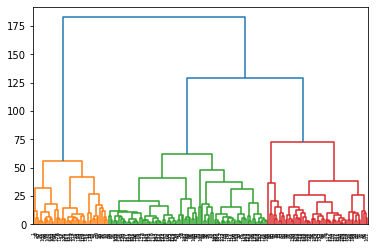

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
clust=linkage(res, method="complete")

Z = sch.linkage(res, method='ward')
dendrogram = sch.dendrogram(Z)
plt.savefig('Q9_dendrogram.png',transparent=True)

In [7]:
from scipy.cluster.hierarchy import cut_tree
#Zijin: the first 0 relates to first column of df, which is the very earlierst date
print(cut_tree(Z, n_clusters = 2).T) # Printing transpose just for spa

[[0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0
  1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 0 1 1 1]]


In [8]:
print(cut_tree(Z, n_clusters = 3).T)

[[0 0 0 1 2 1 0 1 1 0 0 2 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 2 0 0
  1 1 2 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 0 1 0 1 1 1 1 1 1 1 1 2 2
  2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 1 1 0
  1 1 2 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
  1 1 1 2 1 2 1 2 2 2 2 1 1 1 2 2 1 2 2 2 2 1 1 1 1 0 1 1 1 1 0 1 2 2 2 2
  1 1 1 1 2 1 2 2 2 0 1 2 2]]
